In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10
NN = 2*N
#nanometry
#L = 100
#jednostki atomowe
L = 100/0.05292
a = L/(2*N)
m = 0.067
h = 1
w = 10/27211.6
hw = h*w

# Zadanie 1

In [3]:
def initializing():
    nlg=np.zeros((NN**2, 4))
    for j in  range(0, NN):
        for i in range(0, NN):
            nlg[i+(j*NN)][0]=i+(j*NN)+j        + 1   #lewy  dolny
            nlg[i+(j*NN)][1]=i+(j*NN)+j+1      + 1   #prawy dolny
            nlg[i+(j*NN)][2]=i+(j*NN)+j+1+NN   + 1   #lewy  gorny
            nlg[i+(j*NN)][3]=i+(j*NN)+j+1+NN+1 + 1   #prawy gorny
    nlg = nlg.astype(int)
    return nlg

In [4]:
nlg = initializing()

In [5]:
wspx = np.zeros((NN+1, NN+1))
for i in range(NN+1):
    for j in range(NN+1):
        wspx[i, j] = -(L/2) + j * a
        
wspy = np.zeros((NN+1, NN+1))
for i in range(NN+1):
    for j in range(NN+1):
        wspy[i, j] = -(L/2) + i * a

In [6]:
####moj kod
psi_nlg=np.zeros((4*N*N, 4))
for i in range(0, 4*N*N):
    for j in range(0, 4):
        psi_nlg[i][j]=np.exp(-m*w/(2*h)*(wspx[int((nlg[i][j]-1)/(NN+1))][int((nlg[i][j]-1)%(NN+1))]**2 + wspy[int((nlg[i][j]-1)/(NN+1))][int((nlg[i][j]-1)%(NN+1))]**2))

In [7]:
print("Element | Lokalny | Globalny |      X |      Y")
for i in range(0, NN**2):
    for j in range(0, 4):
        print("{:<7} | {:<7} | {:<8} | {:>6.1f} | {:>6.1f}".format(i+1, j+1, nlg[i][j], 
                wspx[int((nlg[i][j]-1)/(NN+1))][int((nlg[i][j]-1)%(NN+1))], 
                wspy[int((nlg[i][j]-1)/(NN+1))][int((nlg[i][j]-1)%(NN+1))]))

Element | Lokalny | Globalny |      X |      Y
1       | 1       | 1        | -944.8 | -944.8
1       | 2       | 2        | -850.3 | -944.8
1       | 3       | 22       | -944.8 | -850.3
1       | 4       | 23       | -850.3 | -850.3
2       | 1       | 2        | -850.3 | -944.8
2       | 2       | 3        | -755.9 | -944.8
2       | 3       | 23       | -850.3 | -850.3
2       | 4       | 24       | -755.9 | -850.3
3       | 1       | 3        | -755.9 | -944.8
3       | 2       | 4        | -661.4 | -944.8
3       | 3       | 24       | -755.9 | -850.3
3       | 4       | 25       | -661.4 | -850.3
4       | 1       | 4        | -661.4 | -944.8
4       | 2       | 5        | -566.9 | -944.8
4       | 3       | 25       | -661.4 | -850.3
4       | 4       | 26       | -566.9 | -850.3
5       | 1       | 5        | -566.9 | -944.8
5       | 2       | 6        | -472.4 | -944.8
5       | 3       | 26       | -566.9 | -850.3
5       | 4       | 27       | -472.4 | -850.3
6       | 1  

In [8]:
coordinates = np.zeros(((NN+1)**2,2))
for i in range(NN+1):
    for j in range(NN+1):
        coordinates[(NN+1)*i+j][0] = wspx[i][j]
        coordinates[(NN+1)*i+j][1] = wspy[i][j]

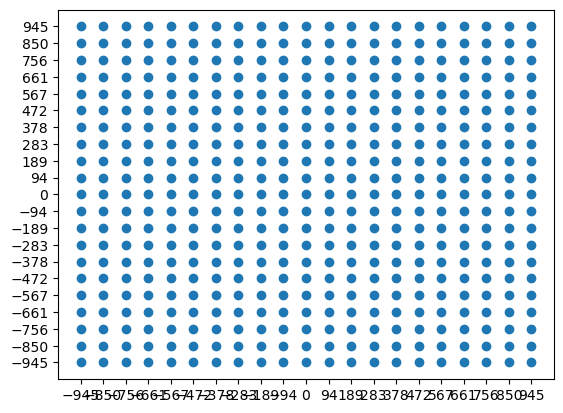

In [9]:
plt.scatter(coordinates[:].T[0],coordinates[:].T[1])
plt.xticks(wspx[0][:])
plt.yticks(wspx[:][0])

plt.show()

In [10]:
def g(i,ksi1,ksi2):
    if i == 0:
        return (1 - ksi1)/2 * (1 - ksi2)/2
    if i == 1:
        return (1 + ksi1)/2 * (1 - ksi2)/2
    if i == 2:
        return (1 - ksi1)/2 * (1 + ksi2)/2
    if i == 3:
        return (1 + ksi1)/2 * (1 + ksi2)/2

In [11]:
ksi_1 = np.arange(-1,1.1,0.1)
ksi_2 = np.arange(-1,1.1,0.1)

PSI = np.zeros((NN**2,ksi_1.shape[0],ksi_2.shape[0]))

for k in range(NN**2):
    for i in range(ksi_1.shape[0]):
        for j in range(ksi_2.shape[0]):
            x = 0.5 * (coordinates[(nlg[k][0] - 1)][0] * (1 - ksi_1[i]) + coordinates[(nlg[k][1] - 1)][0] * (1 + ksi_1[i]))
            y = 0.5 * (coordinates[(nlg[k][1] - 1)][1] * (1 - ksi_2[j]) + coordinates[(nlg[k][2] - 1)][1] * (1 + ksi_2[j]))
            PSI[k][i][j] = psi_nlg[k][0]*g(0,ksi_1[i],ksi_2[j])+psi_nlg[k][1]*g(1,ksi_1[i],ksi_2[j])+psi_nlg[k][2]*g(2,ksi_1[i],ksi_2[j])+psi_nlg[k][3]*g(3,ksi_1[i],ksi_2[j])

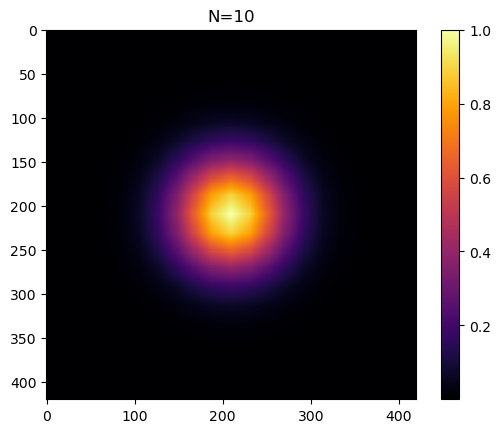

In [12]:
combined_psi = np.concatenate([np.concatenate(PSI[i*NN:(i+1)*NN], axis=0) for i in range(NN)], axis=1)
plt.figure()
plt.imshow(combined_psi, cmap='inferno')
plt.colorbar()
if N == 2:
    plt.title('N=2')
elif N == 10:
    plt.title('N=10')
plt.show()

In [13]:
wx = [5/9, 8/9, 5/9]
px = [-np.sqrt(3/5), 0, np.sqrt(3/5)]
S_k = np.zeros((4,4))


for i in range(4):
    for j in range(4):
        G = 0
        for k in range(3):
            for l in range(3):
                G += wx[k] * wx[l] * g(i,px[l],px[k]) * g(j,px[l],px[k])
        S_k[i,j] = G * a**2/4

In [14]:
9 * 4 * S_k / (a**2)

array([[4., 2., 2., 1.],
       [2., 4., 1., 2.],
       [2., 1., 4., 2.],
       [1., 2., 2., 4.]])

In [15]:
def dg(i,f, ksi1, ksi2):
    d = 0.001
    if f == 1:
        return (g(i,ksi1,ksi2 + d) - g(i,ksi1,ksi2 - d))/(2*d)
    if f == 2:
        return (g(i,ksi1 + d,ksi2) - g(i,ksi1 - d,ksi2))/(2*d)

In [16]:
T_k = np.zeros((4,4))

for i in range(4):
    for j in range(4):
        DG = 0
        for k in range(3):
            for l in range(3):
                DG += wx[k] * wx[l] * (dg(i,1,px[l],px[k]) * dg(j,1,px[l],px[k]) + dg(i,2,px[l],px[k]) * dg(j,2,px[l],px[k]))
        T_k[i,j] = DG * h**2 / (2*m)

In [17]:
6*T_k*2*m/h**2

array([[ 4., -1., -1., -2.],
       [-1.,  4., -2., -1.],
       [-1., -2.,  4., -1.],
       [-2., -1., -1.,  4.]])

In [18]:
# V_k = np.zeros((NN**2,4,4))
# V_nlg = np.zeros((4,4))

# for n in range(NN**2):
#     for i in range(4):
#         for j in range(4):
#             V = 0
#             for k in range(ksi_1.shape[0]):
#                 for l in range(ksi_2.shape[0]):
#                     x = 0.5 * (coordinates[(nlg[n][0] - 1)][0] * (1 - ksi_1[k]) + coordinates[(nlg[n][1] - 1)][0] * (1 + ksi_1[k]))
#                     y = 0.5 * (coordinates[(nlg[n][1] - 1)][1] * (1 - ksi_2[l]) + coordinates[(nlg[n][2] - 1)][1] * (1 + ksi_2[l]))

#                     V += (x**2 + y**2) * g(i,ksi_1[k],ksi_2[l]) * g(j,ksi_1[k],ksi_2[l]) * 0.01
#             V_nlg[i,j] = V * a**2 / 4 * hw**2 *m / 2
#     V_k[n] = V_nlg

In [19]:
# V_k[10] #/(S_k) * 27211.6

In [20]:
V_k = np.zeros((NN**2,4,4))
V_nlg = np.zeros((4,4))
for n in range(NN**2):
    for i in range(4):
        for j in range(4):
            V = 0
            for k in range(3):
                for l in range(3):
                    x = 0.5 * (coordinates[(nlg[n][0] - 1)][0] * (1 - px[k]) + coordinates[(nlg[n][1] - 1)][0] * (1 + px[k]))
                    y = 0.5 * (coordinates[(nlg[n][1] - 1)][1] * (1 - px[l]) + coordinates[(nlg[n][2] - 1)][1] * (1 + px[l]))

                    V += wx[k] * wx[l] * (x**2 + y**2) * g(i,px[k],px[l]) * g(j,px[k],px[l]) 
            V_nlg[i,j] = V * a**2 / 4 * hw**2 *m / 2
    V_k[n] = V_nlg

In [21]:
X_k = np.zeros((NN**2,4,4))
X_nlg = np.zeros((4,4))

for n in range(NN**2):
    for i in range(4):
        for j in range(4):
            X = 0
            for k in range(3):
                for l in range(3):
                    x = 0.5 * (coordinates[(nlg[n][0] - 1)][0] * (1 - px[k]) + coordinates[(nlg[n][1] - 1)][0] * (1 + px[k]))
                    # y = 0.5 * (coordinates[(nlg[n][1] - 1)][1] * (1 - px[l]) + coordinates[(nlg[n][2] - 1)][1] * (1 + px[l]))
                    X += wx[k] * wx[l] * x * g(i,px[k],px[l]) * g(j,px[k],px[l]) 
            X_nlg[i,j] = X
    X_k[n] = X_nlg

In [22]:
S = np.zeros(((NN+1)**2,(NN+1)**2))
H = np.zeros(((NN+1)**2,(NN+1)**2))
X = np.zeros(((NN+1)**2,(NN+1)**2))

for k in range(NN**2):
    for i1 in range(4):
        for i2 in range(4):
            S[nlg[k][i1]-1,nlg[k][i2]-1] += S_k[i1,i2]
            H[nlg[k][i1]-1,nlg[k][i2]-1] += T_k[i1,i2] + V_k[k,i1,i2]
            X[nlg[k][i1]-1,nlg[k][i2]-1] += X_k[k,i1,i2]

In [23]:
S

array([[ 991.87701918,  495.93850959,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 495.93850959, 1983.75403837,  495.93850959, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  495.93850959, 1983.75403837, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ..., 1983.75403837,
         495.93850959,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,  495.93850959,
        1983.75403837,  495.93850959],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         495.93850959,  991.87701918]])

In [24]:
H

array([[12.59425341,  2.46964299,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.46964299, 24.06686848,  2.10911638, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  2.10911638, 22.70487907, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 22.70487907,
         2.10911638,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  2.10911638,
        24.06686848,  2.46964299],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         2.46964299, 12.59425341]])

In [25]:
X

array([[-409.42302847, -199.46250105,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-199.46250105, -755.85789872, -178.46644831, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , -178.46644831, -671.87368775, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  671.87368775,
         178.46644831,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,  178.46644831,
         755.85789872,  199.46250105],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         199.46250105,  409.42302847]])

In [26]:
def brzeg(a):
    if (a<NN+1):
        return 0
    elif (a>((NN+1)**2)-(NN+2)):
        return 0
    elif (((a+1)%(NN+1))==1):
        return 0
    elif (((a+1)%(NN+1))==0):
        return 0
    else:
        return 1

In [27]:
#Warunki brzegowe
for i in range(0, (NN+1)**2):
    if brzeg(i)==0: 
        for j in range(0, (NN+1)**2):
            S[i][j]=0
            S[j][i]=0
            H[i][j]=0
            H[j][i]=0
            S[i][i]=1
            H[i][i]=-1410



In [28]:
H

array([[-1410.,     0.,     0., ...,     0.,     0.,     0.],
       [    0., -1410.,     0., ...,     0.,     0.,     0.],
       [    0.,     0., -1410., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ..., -1410.,     0.,     0.],
       [    0.,     0.,     0., ...,     0., -1410.,     0.],
       [    0.,     0.,     0., ...,     0.,     0., -1410.]])

In [29]:
S

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
from scipy.linalg import eigh
# Rozwiązanie układu równań własnych Hc = EcS
energies, eigenvectors = eigh(H, S)

wektor=np.zeros((NN+1)**2)
for i in range(0, (NN+1)**2):
    wektor[i]=eigenvectors[i][((NN+1)**2-1)-(NN-1)**2+4]

# Wydruk wyników
# print("Energia własna:", energies)
print("Wektory własne:")
print(eigenvectors)

Wektory własne:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
wektor

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.88893247e-10,  4.62308881e-09,
        2.48845781e-08,  9.70346153e-08,  2.81057065e-07,  6.09883928e-07,
        9.82098233e-07,  1.12335351e-06,  7.74785163e-07, -1.58859454e-14,
       -7.74785154e-07, -1.12335347e-06, -9.82098224e-07, -6.09883918e-07,
       -2.81057031e-07, -9.70346480e-08, -2.48846021e-08, -4.62310979e-09,
       -5.88875954e-10,  3.33066907e-16, -5.55111512e-17,  4.62310327e-09,
        3.62935766e-08,  1.95356256e-07,  7.61769244e-07,  2.20643516e-06,
        4.78788668e-06,  7.70995091e-06,  8.81887365e-06,  6.08244210e-06,
        7.34284042e-14, -

In [32]:
# print("Energia własna:", energies)
energies[((NN+1)**2-1)-(NN-1)**2+1]

0.00037251980303484335

In [33]:
np.size(wektor)

441

In [34]:
PSI = np.zeros((NN**2,ksi_1.shape[0],ksi_2.shape[0]))
for k in range(NN**2):
    for i in range(ksi_1.shape[0]):
        for j in range(ksi_2.shape[0]):
            x = 0.5 * (coordinates[(nlg[k][0] - 1)][0] * (1 - ksi_1[i]) + coordinates[(nlg[k][1] - 1)][0] * (1 + ksi_1[i]))
            y = 0.5 * (coordinates[(nlg[k][1] - 1)][1] * (1 - ksi_2[j]) + coordinates[(nlg[k][2] - 1)][1] * (1 + ksi_2[j]))
            PSI[k][i][j] = wektor[int(nlg[k][0])-1]*g(0,ksi_1[i],ksi_2[j])+wektor[int(nlg[k][1])-1]*g(1,ksi_1[i],ksi_2[j])+wektor[int(nlg[k][2])-1]*g(2,ksi_1[i],ksi_2[j])+wektor[int(nlg[k][3])-1]*g(3,ksi_1[i],ksi_2[j])

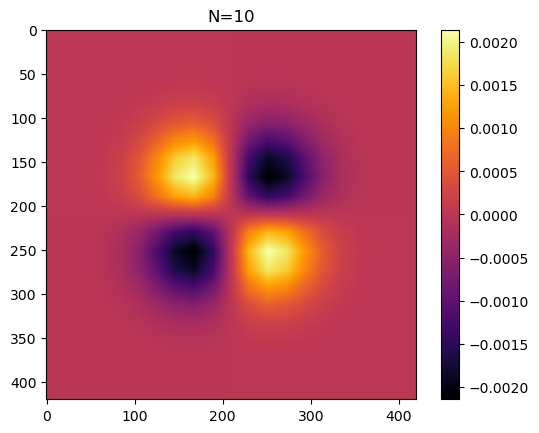

In [35]:
combined_psi = np.concatenate([np.concatenate(PSI[i*NN:(i+1)*NN], axis=0) for i in range(NN)], axis=1)
plt.figure()
plt.imshow(combined_psi, cmap='inferno')
plt.colorbar()
if N == 2:
    plt.title('N=2')
elif N == 10:
    plt.title('N=10')
plt.show()

In [36]:
c1 = np.zeros((NN+1)**2)
c2 = np.zeros((NN+1)**2)

for i in range(0, (NN+1)**2):
    c1[i] = eigenvectors[i][((NN+1)**2-1)-(NN-1)**2+1]
    c2[i] = eigenvectors[i][((NN+1)**2-1)-(NN-1)**2+2]

E1 = energies[((NN+1)**2-1)-(NN-1)**2+1]
E2 = energies[((NN+1)**2-1)-(NN-1)**2+2]
dE = E2 - E1
print(dE)

0.0003773583719459591


In [37]:
# X_k = np.zeros((NN**2,4,4))
# X_nlg = np.zeros((4,4))

# for n in range(NN**2):
#     for i in range(4):
#         for j in range(4):
#             X = 0
#             for k in range(3):
#                 for l in range(3):
#                     x = 0.5 * (coordinates[(nlg[n][0] - 1)][0] * (1 - px[k]) + coordinates[(nlg[n][1] - 1)][0] * (1 + px[k]))
#                     # y = 0.5 * (coordinates[(nlg[n][1] - 1)][1] * (1 - px[l]) + coordinates[(nlg[n][2] - 1)][1] * (1 + px[l]))
#                     X += wx[k] * wx[l] * x * g(i,px[k],px[l]) * g(j,px[k],px[l]) 
#             X_nlg[i,j] = X
#     X_k[n] = X_nlg

In [38]:
X_k

array([[[-409.42302847, -199.46250105, -204.71151424,  -99.73125052],
        [-199.46250105, -388.42697573,  -99.73125052, -194.21348786],
        [-204.71151424,  -99.73125052, -409.42302847, -199.46250105],
        [ -99.73125052, -194.21348786, -199.46250105, -388.42697573]],

       [[-367.43092299, -178.46644831, -183.71546149,  -89.23322415],
        [-178.46644831, -346.43487024,  -89.23322415, -173.21743512],
        [-183.71546149,  -89.23322415, -367.43092299, -178.46644831],
        [ -89.23322415, -173.21743512, -178.46644831, -346.43487024]],

       [[-325.4388175 , -157.47039557, -162.71940875,  -78.73519778],
        [-157.47039557, -304.44276476,  -78.73519778, -152.22138238],
        [-162.71940875,  -78.73519778, -325.4388175 , -157.47039557],
        [ -78.73519778, -152.22138238, -157.47039557, -304.44276476]],

       ...,

       [[ 304.44276476,  157.47039557,  152.22138238,   78.73519778],
        [ 157.47039557,  325.4388175 ,   78.73519778,  162.71940875],
 

In [39]:
# szukana
dd = np.zeros((NN+1)**2, dtype = complex)

d = np.zeros((NN+1)**2, dtype = complex)
d = c1 + c2
dt = 100

Left = np.zeros(((NN+1)**2, (NN+1)**2), dtype = complex)
Right = np.zeros(((NN+1)**2, (NN+1)**2), dtype = complex)

Left = S - dt/(2*h*1j) * H
Right = S + dt/(2*h*1j) * H

In [48]:
int(2*np.pi/dE)

16650

In [56]:
t_max  = 16700
x = np.zeros(int(t_max / dt))
temp_d = np.zeros(d.shape[0], dtype = complex)

for tt in range(0,t_max,dt):
    dd = np.zeros((NN+1)**2, dtype = complex)
    temp = Right.dot(d)
    temp2 = X.dot(d)
    for conj in range(d.shape[0]):
        temp_d[conj] = d[conj].conjugate()
    x[int(tt/dt)] = temp_d.dot(temp2)
    
    dd = np.linalg.solve(Left,temp)
    d = dd

/tmp/ipykernel_21506/719470910.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  x[int(tt/dt)] = temp_d.dot(temp2)


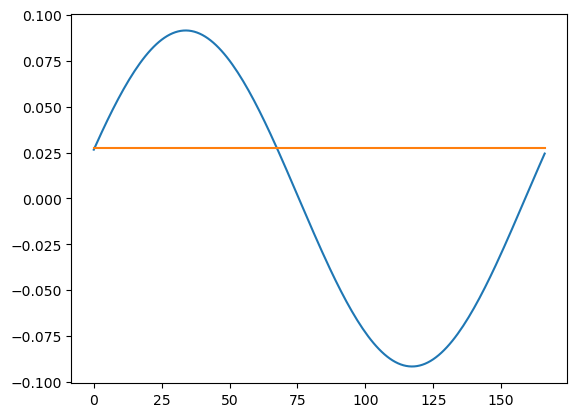

In [57]:
# xdxd = [-3j, 2+5j]
# print(xdxd)
# print(xdxd[0].conjugate())

plt.figure()
plt.plot(x)
TT = np.linspace(0,x.shape[0])
XX = np.ones(x.shape[0])
XX += x[0]
plt.plot(x[0]*XX)


In [41]:
t_max

16650